## Prob 10

In [222]:
from liblinear import liblinearutil
from itertools import combinations_with_replacement
import numpy as np
from pathlib import Path
import pandas as pd
import math

In [223]:
def read_file(path):
    with path.open("r") as f:
        train_lines = f.readlines()
        x, y = [], []
        for line in train_lines:
            line_split = line.strip('\n').split(" ")
            d = [float(line_s) for line_s in line_split]
            x.append(d[:-1])
            y.append(d[-1])
    
    return x, y

In [224]:
# n 個相異物取 Q 個的組合(可重複取)
# x0 + ... + xQ = n, s.t., x0,...xQ>=0, x0,...,xQ 屬於自然數
# C^(n+k-1)_(Q)

def transform(data, Q=3):
    # Add bias
    data = np.insert(data, 0, 1, axis=1)
    
    # Generate all combinations & Multipy them
    new_data = []
    for data_single in data:
        combinations = list(combinations_with_replacement(data_single, Q))
        new_data_single = []
        for combo in combinations:
            total = 1
            for c in combo:
                total *= c
            new_data_single.append(total)
        new_data.append(new_data_single)
    
    return new_data

In [225]:
'''
e.g.,
y, x = [1,-1], [[1,0,1], [-1,0,-1]]
y, x = [1,-1], [{1:1, 3:1}, {1:-1,3:-1}]
'''

def to_liblinear_format(x, y):
    x = [{i+1:x for i, x in enumerate(xs)} for xs in x]
    return x, y

In [226]:
data_dir = Path("data")
train_path = data_dir / "hw4_train.dat"

x, y = read_file(train_path)

x = poly_transform(x, 3)
x_train, y_train = to_liblinear_format(x, y)

In [227]:
def l_to_c(l):
    return 1 / 2 / l

def l_log_to_l(l_log):
    return math.pow(10, l_log)

In [134]:
lambdas_log = [-6, -4, -2, 0, 2]
acc_logs = []
for l_log in lambdas_log:
    l = l_log_to_l(l_log)
    c = l_to_c(l)
    params = '-s 0 -c ' + str(c) + ' -e 0.000001'
    model = liblinearutil.train(y_train, x_train, params)
    # acc : zerorone error, mean squared error, and squared correlation coefficient (for regression)
    preds, acc, scores = liblinearutil.predict(y_train, x_train, model)
    acc_logs.append({l_log : acc[0]})

Accuracy = 96% (192/200) (classification)
Accuracy = 92% (184/200) (classification)
Accuracy = 91% (182/200) (classification)
Accuracy = 87.5% (175/200) (classification)
Accuracy = 80.5% (161/200) (classification)


## Prob 11

In [137]:
from sklearn.model_selection import train_test_split

N_EPOCHS = 128

acc_best_logs = []
for i in range(N_EPOCHS):
    print("----------------")
    x_train_s, x_val_s, y_train_s, y_val_s = train_test_split(x_train, y_train, test_size=0.4, random_state=i)

    lambdas_log = [-6, -4, -2, 0, 2]
    best_lambda, best_acc = -1, -1
    for l_log in lambdas_log:
        l = l_log_to_l(l_log)
        c = l_to_c(l)
        params = '-s 0 -c ' + str(c) + ' -e 0.000001'
        model = liblinearutil.train(y_train_s, x_train_s, params)
        # acc : zerorone error, mean squared error, and squared correlation coefficient (for regression)
        preds, acc, scores = liblinearutil.predict(y_val_s, x_val_s, model)
        if acc[0] > best_acc:
            best_acc = acc[0]
            best_lambda = l_log
    acc_best_logs.append(best_lambda)

----------------
Accuracy = 75% (60/80) (classification)
Accuracy = 82.5% (66/80) (classification)
Accuracy = 83.75% (67/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 81.25% (65/80) (classification)
----------------
Accuracy = 80% (64/80) (classification)
Accuracy = 83.75% (67/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 83.75% (67/80) (classification)
Accuracy = 67.5% (54/80) (classification)
----------------
Accuracy = 80% (64/80) (classification)
Accuracy = 82.5% (66/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 88.75% (71/80) (classification)
Accuracy = 80% (64/80) (classification)
----------------
Accuracy = 76.25% (61/80) (classification)
Accuracy = 78.75% (63/80) (classification)
Accuracy = 82.5% (66/80) (classification)
Accuracy = 82.5% (66/80) (classification)
Accuracy = 77.5% (62/80) (classification)
----------------
Accuracy = 75% (60/80) (classification)
Accuracy = 81.25% (65/80) (classifi

Accuracy = 85% (68/80) (classification)
Accuracy = 81.25% (65/80) (classification)
----------------
Accuracy = 75% (60/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 76.25% (61/80) (classification)
----------------
Accuracy = 75% (60/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 88.75% (71/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 82.5% (66/80) (classification)
----------------
Accuracy = 83.75% (67/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 85% (68/80) (classification)
Accuracy = 88.75% (71/80) (classification)
Accuracy = 82.5% (66/80) (classification)
----------------
Accuracy = 75% (60/80) (classification)
Accuracy = 77.5% (62/80) (classification)
Accuracy = 83.75% (67/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 75% (60/80) (classification)
---------

Accuracy = 78.75% (63/80) (classification)
Accuracy = 77.5% (62/80) (classification)
Accuracy = 78.75% (63/80) (classification)
Accuracy = 78.75% (63/80) (classification)
Accuracy = 77.5% (62/80) (classification)
----------------
Accuracy = 78.75% (63/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 81.25% (65/80) (classification)
----------------
Accuracy = 78.75% (63/80) (classification)
Accuracy = 80% (64/80) (classification)
Accuracy = 82.5% (66/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 75% (60/80) (classification)
----------------
Accuracy = 77.5% (62/80) (classification)
Accuracy = 90% (72/80) (classification)
Accuracy = 90% (72/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 78.75% (63/80) (classification)
----------------
Accuracy = 76.25% (61/80) (classification)
Accuracy = 83.75% (67/80) (classification)
Ac

Accuracy = 85% (68/80) (classification)
Accuracy = 85% (68/80) (classification)
Accuracy = 88.75% (71/80) (classification)
Accuracy = 81.25% (65/80) (classification)
----------------
Accuracy = 83.75% (67/80) (classification)
Accuracy = 83.75% (67/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 91.25% (73/80) (classification)
Accuracy = 87.5% (70/80) (classification)
----------------
Accuracy = 83.75% (67/80) (classification)
Accuracy = 86.25% (69/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 82.5% (66/80) (classification)
----------------
Accuracy = 73.75% (59/80) (classification)
Accuracy = 78.75% (63/80) (classification)
Accuracy = 87.5% (70/80) (classification)
Accuracy = 82.5% (66/80) (classification)
Accuracy = 76.25% (61/80) (classification)
----------------
Accuracy = 82.5% (66/80) (classification)
Accuracy = 81.25% (65/80) (classification)
Accuracy = 85% (68/80) (classification)
Ac

<AxesSubplot:xlabel='best_lambda', ylabel='Count'>

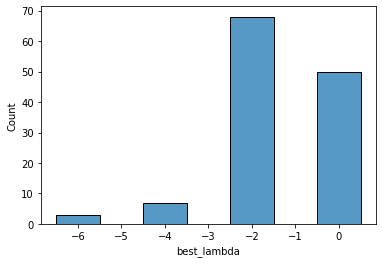

In [140]:
import seaborn as sns
df = pd.DataFrame({"best_lambda":acc_best_logs})
sns.histplot(data=df, x="best_lambda", discrete=True)

## Prob 12

In [228]:
def CrossValidation(x, y, V):
    x_train = np.concatenate((x[:V * 40],x[(V + 1) * 40:]))
    y_train = np.concatenate((y[:V * 40],y[(V + 1) * 40:]))
    x_val = x[V * 40:(V + 1) * 40]
    y_val = y[V * 40:(V + 1) * 40]
    return x_train, y_train, x_val, y_val

In [231]:
from sklearn.model_selection import train_test_split

N_EPOCHS = 128
N_FOLDS = 5
num_train_sample = len(x_train) // N_FOLDS

x_train, y_train = np.array(x_train), np.array(y_train)

acc_best_logs = []
for i in range(N_EPOCHS):
    print("-----------EPOCH {}------------".format(i+1))
    # Shuffle Data
    np.random.seed(i)
    indices = np.random.permutation(len(x_train))
    x_train_shuf = x_train[indices]
    y_train_shuf = y_train[indices]

    # Operation
    lambdas_log = [-6, -4, -2, 0, 2]
    best_lambda, best_acc = -1, -1
    for l_log in lambdas_log:
        print("-----------LAMBDA_LOGS {}---------------".format(l_log))
        l = l_log_to_l(l_log)
        c = l_to_c(l)
        params = '-s 0 -c ' + str(c) + ' -e 0.000001'
        total_acc = 0
        for j in range(N_FOLDS):
            x_train_s, y_train_s, x_val, y_val = CrossValidation(x_train_shuf, y_train_shuf, j)
            model = liblinearutil.train(y_train_s, x_train_s, params)
            
            # acc : accuracy (for classification), mean squared error, and squared correlation coefficient (for regression)
            preds, acc, scores = liblinearutil.predict(y_val, x_val, model)
            total_acc += acc[0]
        
        acc = total_acc / N_FOLDS
        print(acc)
        if acc > best_acc:
            best_acc = acc
            best_lambda = l_log
    
    acc_best_logs.append(best_lambda)

-----------EPOCH 1------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 80% (32/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 67.5% (27/40) (classification)
79.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 77.5% (31/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 77.5% (31/40) (classification)
84.0
-----------LAMBDA_LOGS -2---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 82.5% (33/40) (classification)
87.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy 

Accuracy = 82.5% (33/40) (classification)
85.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
86.5
-----------LAMBDA_LOGS 2---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 77.5% (31/40) (classification)
80.5
-----------EPOCH 8------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
84.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 80% (32/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 82

Accuracy = 90% (36/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 70% (28/40) (classification)
Accuracy = 82.5% (33/40) (classification)
79.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 87.5% (35/40) (classification)
82.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
86.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 95% (38/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 95% (38/40) (classification)
86.5
-----------LAMBDA_LOGS 2---------------
Accu

Accuracy = 95% (38/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
86.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 90% (36/40) (classification)
84.5
-----------LAMBDA_LOGS 2---------------
Accuracy = 75% (30/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 90% (36/40) (classification)
80.5
-----------EPOCH 21------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 85% (34/40) (classification)
82.5
-----------LA

Accuracy = 90% (36/40) (classification)
Accuracy = 70% (28/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 75% (30/40) (classification)
81.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 72.5% (29/40) (classification)
81.0
-----------LAMBDA_LOGS -2---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
85.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 97.5% (39/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 82.5% (33/40) (classification)
85.5
-----------LAMBDA_LOGS 2---------------
Ac

Accuracy = 87.5% (35/40) (classification)
Accuracy = 90% (36/40) (classification)
87.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
87.0
-----------LAMBDA_LOGS 2---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 77.5% (31/40) (classification)
80.5
-----------EPOCH 34------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 60% (24/40) (classification)
80.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy

Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 70% (28/40) (classification)
Accuracy = 75% (30/40) (classification)
80.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 70% (28/40) (classification)
Accuracy = 80% (32/40) (classification)
82.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 87.5% (35/40) (classification)
86.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 87.5% (35/40) (classification)
86.5
-----------LAMBDA_LOGS 2---------------
Ac

Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
85.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 77.5% (31/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 90% (36/40) (classification)
83.5
-----------LAMBDA_LOGS 2---------------
Accuracy = 72.5% (29/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
80.5
-----------EPOCH 47------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 72.5% (29/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 85% (34/40) (classification)
80.5
---------

Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 85% (34/40) (classification)
81.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 90% (36/40) (classification)
85.0
-----------LAMBDA_LOGS -2---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
87.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
87.5
-----------LAMBDA_LOGS 2----------

Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
86.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 82.5% (33/40) (classification)
85.5
-----------LAMBDA_LOGS 2---------------
Accuracy = 75% (30/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 85% (34/40) (classification)
81.0
-----------EPOCH 60------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 72.5% (29/40) (classification)
80.0
---------

Accuracy = 87.5% (35/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 72.5% (29/40) (classification)
80.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 82.5% (33/40) (classification)
81.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 90% (36/40) (classification)
85.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
85.5
-----------LAMBDA_LOGS 2------------

Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 75% (30/40) (classification)
80.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 85% (34/40) (classification)
84.0
-----------LAMBDA_LOGS -2---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
84.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
86.5
-----------LAMBDA_LOGS 2--------------

Accuracy = 72.5% (29/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 77.5% (31/40) (classification)
79.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 82.5% (33/40) (classification)
84.0
-----------LAMBDA_LOGS -2---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
87.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 80% (32/40) (classification)
Accuracy = 97.5% (39/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 80% (32/40) (classification)
85.5
-----------LAMBDA_LOGS 2------------

Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 92.5% (37/40) (classification)
85.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 97.5% (39/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 82.5% (33/40) (classification)
86.5
-----------LAMBDA_LOGS 2---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 82.5% (33/40) (classification)
80.5
-----------EPOCH 87------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 77.5% (31/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 87.5% (35/40) (classification)
80.5
---

Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
85.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 85% (34/40) (classification)
84.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 90% (36/40) (classification)
87.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 92.5% (37/40) (classification)
87.0
-----------LAMBDA_LOGS 2------------

Accuracy = 65% (26/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
79.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 70% (28/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
83.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 72.5% (29/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 90% (36/40) (classification)
86.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 77.5% (31/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 95% (38/40) (classification)
86.0
-----------LAMBDA_LOGS 2---------------
Accu

Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 70% (28/40) (classification)
83.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 75% (30/40) (classification)
84.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 85% (34/40) (classification)
87.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
86.5
-----------LAMBDA_LOGS 2----------

Accuracy = 90% (36/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
87.0
-----------LAMBDA_LOGS 0---------------
Accuracy = 90% (36/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
87.5
-----------LAMBDA_LOGS 2---------------
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 75% (30/40) (classification)
Accuracy = 75% (30/40) (classification)
80.5
-----------EPOCH 114------------
-----------LAMBDA_LOGS -6---------------
Accuracy = 72.5% (29/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 95% (38/40) (classification)
Accuracy = 65% (26/40) (classification)
Accuracy = 82.5% (33/40) (classification)
82.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 82.5% (33/40) (classification)
Accuracy = 

Accuracy = 95% (38/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 70% (28/40) (classification)
Accuracy = 72.5% (29/40) (classification)
Accuracy = 85% (34/40) (classification)
81.0
-----------LAMBDA_LOGS -4---------------
Accuracy = 95% (38/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 70% (28/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 80% (32/40) (classification)
81.5
-----------LAMBDA_LOGS -2---------------
Accuracy = 95% (38/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 77.5% (31/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 85% (34/40) (classification)
84.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 87.5% (35/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 92.5% (37/40) (classification)
85.0
-----------LAMBDA_LOGS 2---------------
Ac

Accuracy = 95% (38/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 80% (32/40) (classification)
Accuracy = 77.5% (31/40) (classification)
84.5
-----------LAMBDA_LOGS -4---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 82.5% (33/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 77.5% (31/40) (classification)
85.0
-----------LAMBDA_LOGS -2---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 87.5% (35/40) (classification)
Accuracy = 90% (36/40) (classification)
Accuracy = 77.5% (31/40) (classification)
86.5
-----------LAMBDA_LOGS 0---------------
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 92.5% (37/40) (classification)
Accuracy = 85% (34/40) (classification)
Accuracy = 80% (32/40) (classification)
87.0
-----------LAMBDA_LOGS 2----------

<AxesSubplot:xlabel='best_lambda', ylabel='Count'>

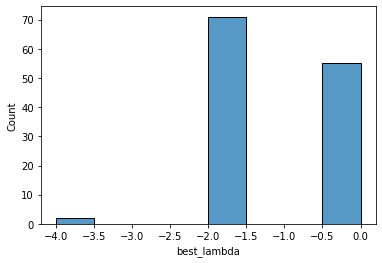

In [232]:
import seaborn as sns
df = pd.DataFrame({"best_lambda":acc_best_logs})
sns.histplot(data=df, x="best_lambda")